## 네이버 API를 활용한 시각화

### '몰스킨' 상품 검색

In [13]:
import os
import sys
import urllib.request
client_id = "7CiLKwGBt8P7tH1dYdDA"
client_secret = "OZ3pPFfpdX"
encText = urllib.parse.quote("몰스킨")
url = "https://openapi.naver.com/v1/search/shop?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)   
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Mon, 12 Jun 2023 14:28:52 +0900",
	"total":27670,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"[<b>몰스킨<\/b>] 2023-24년 18개월 다이어리(데일리, 위클리)",
			"link":"https:\/\/search.shopping.naver.com\/gate.nhn?id=39859450686",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_3985945\/39859450686.jpg",
			"lprice":"35000",
			"hprice":"",
			"mallName":"몰스킨공식온라인스토어",
			"productId":"39859450686",
			"productType":"2",
			"brand":"몰스킨",
			"maker":"",
			"category1":"생활\/건강",
			"category2":"문구\/사무용품",
			"category3":"다이어리\/플래너",
			"category4":"다이어리"
		},
		{
			"title":"<b>몰스킨<\/b> 클래식노트 플레인 소프트커버 포켓 Pocket",
			"link":"https:\/\/search.shopping.naver.com\/gate.nhn?id=30656121375",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_3065612\/30656121375.20220124025746.jpg",
			"lprice":"21840",
			"hprice":"",
			"mallName":"네이버",
			"productId":"30656121375",
			"productType":"1",
			"brand":"몰스킨",
			"maker":"",
			"category1":"생활\/건강",
			"category2":"문구\/사무

In [22]:
# URL을 만드는 테스트
def gen_search_url(api_node, search_text, start_num, disp_num):
    base = 'https://openapi.naver.com/v1/search'
    node = '/' + api_node + '.json'
    param_query = '?query=' + urllib.parse.quote(search_text)
    param_start = '&start=' + str(start_num)
    param_disp = '&display=' + str(disp_num)
    
    return base + node + param_query + param_start + param_disp

In [23]:
gen_search_url('shop', 'TEST', 10, 3)

'https://openapi.naver.com/v1/search/shop.json?query=TEST&start=10&display=3'

### 하나의 페이지에서 데이터를 받아오기

In [24]:
import json
import datetime

In [25]:
def get_reult_onepage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)   
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    print('[%s] URL Request Success' % datetime.datetime.now())
    return json.loads(response.read().decode('utf-8'))

In [26]:
datetime.datetime.now()

datetime.datetime(2023, 6, 12, 15, 10, 10, 582139)

In [27]:
# 데이터 받아오기 성공여부 확인
url = gen_search_url('shop', '몰스킨', 1, 5)
one_result = get_reult_onepage(url)

[2023-06-12 15:10:11.933724] URL Request Success


In [28]:
one_result

{'lastBuildDate': 'Mon, 12 Jun 2023 15:10:10 +0900',
 'total': 27671,
 'start': 1,
 'display': 5,
 'items': [{'title': '[<b>몰스킨</b>] 2023-24년 18개월 다이어리(데일리, 위클리)',
   'link': 'https://search.shopping.naver.com/gate.nhn?id=39859450686',
   'image': 'https://shopping-phinf.pstatic.net/main_3985945/39859450686.jpg',
   'lprice': '35000',
   'hprice': '',
   'mallName': '몰스킨공식온라인스토어',
   'productId': '39859450686',
   'productType': '2',
   'brand': '몰스킨',
   'maker': '',
   'category1': '생활/건강',
   'category2': '문구/사무용품',
   'category3': '다이어리/플래너',
   'category4': '다이어리'},
  {'title': '<b>몰스킨</b> 클래식노트 플레인 소프트커버 포켓 Pocket',
   'link': 'https://search.shopping.naver.com/gate.nhn?id=30656121375',
   'image': 'https://shopping-phinf.pstatic.net/main_3065612/30656121375.20220124025746.jpg',
   'lprice': '21840',
   'hprice': '',
   'mallName': '네이버',
   'productId': '30656121375',
   'productType': '1',
   'brand': '몰스킨',
   'maker': '',
   'category1': '생활/건강',
   'category2': '문구/사무용품',
  

In [29]:
# 첫번째 아이템 타이틀 가져오기
one_result['items'][0]['title']

# 다른거 뽑으려면 'lprice', 'mallName' 등을 넣어주면 된다

'[<b>몰스킨</b>] 2023-24년 18개월 다이어리(데일리, 위클리)'

### get_fields()

필드 불러와서 데이터프레임으로 만들기

In [30]:
import pandas as pd

In [31]:
def get_fields(json_data):
    title = [each['title'] for each in json_data['items']]
    link = [each['link'] for each in json_data['items']]
    lprice = [each['lprice'] for each in json_data['items']]
    mall_name = [each['mallName'] for each in json_data['items']]
    
    result_pd = pd.DataFrame({
        'title':title,
        'link':link,
        'lprice':lprice,
        'mall':mall_name
    }, columns=['title', 'lprice', 'link', 'mall'])
    
    return result_pd

In [32]:
get_fields(one_result)

,title,lprice,link,mall
0,"[<b>몰스킨</b>] 2023-24년 18개월 다이어리(데일리, 위클리)",35000,https://search.shopping.naver.com/gate.nhn?id=...,몰스킨공식온라인스토어
1,<b>몰스킨</b> 클래식노트 플레인 소프트커버 포켓 Pocket,21840,https://search.shopping.naver.com/gate.nhn?id=...,네이버
2,<b>몰스킨</b> 2024 위클리 18개월 다이어리 소프트커버 상품선택,31490,https://search.shopping.naver.com/gate.nhn?id=...,네이버
3,"2023년 <b>몰스킨</b> 하드커버 다이어리(데일리, 위클리, 한정판)",20000,https://search.shopping.naver.com/gate.nhn?id=...,안네프랑크
4,시리즈 역시즌 50 series <b>몰스킨</b> 집업 아우터 셔츠 SASFW22...,104760,https://search.shopping.naver.com/gate.nhn?id=...,네이버


## delete_tag()

title에 붙어있는 태그 지우기

In [39]:
def delete_tag(input_str):
    input_str = input_str.replace('<b>','')
    input_str = input_str.replace('</b>','')
    return input_str

In [40]:
# 필드 다시 불러오기
import pandas as pd

def get_fields(json_data):
    title = [delete_tag(each['title']) for each in json_data['items']]
    link = [each['link'] for each in json_data['items']]
    lprice = [each['lprice'] for each in json_data['items']]
    mall_name = [each['mallName'] for each in json_data['items']]
    
    result_pd = pd.DataFrame({
        'title':title,
        'link':link,
        'lprice':lprice,
        'mall':mall_name
    }, columns=['title', 'lprice', 'link', 'mall'])
    
    return result_pd

In [41]:
get_fields(one_result)

,title,lprice,link,mall
0,"[몰스킨] 2023-24년 18개월 다이어리(데일리, 위클리)",35000,https://search.shopping.naver.com/gate.nhn?id=...,몰스킨공식온라인스토어
1,몰스킨 클래식노트 플레인 소프트커버 포켓 Pocket,21840,https://search.shopping.naver.com/gate.nhn?id=...,네이버
2,몰스킨 2024 위클리 18개월 다이어리 소프트커버 상품선택,31490,https://search.shopping.naver.com/gate.nhn?id=...,네이버
3,"2023년 몰스킨 하드커버 다이어리(데일리, 위클리, 한정판)",20000,https://search.shopping.naver.com/gate.nhn?id=...,안네프랑크
4,시리즈 역시즌 50 series 몰스킨 집업 아우터 셔츠 SASFW22821KHL,104760,https://search.shopping.naver.com/gate.nhn?id=...,네이버


In [42]:
url = gen_search_url('shop','몰스킨', 1, 5)
json_result = get_reult_onepage(url)
pd_result = get_fields(json_result)

[2023-06-12 15:45:36.290163] URL Request Success


In [43]:
pd_result

,title,lprice,link,mall
0,"[몰스킨] 2023-24년 18개월 다이어리(데일리, 위클리)",35000,https://search.shopping.naver.com/gate.nhn?id=...,몰스킨공식온라인스토어
1,몰스킨 클래식노트 플레인 소프트커버 포켓 Pocket,21840,https://search.shopping.naver.com/gate.nhn?id=...,네이버
2,몰스킨 2024 위클리 18개월 다이어리 소프트커버 상품선택,31490,https://search.shopping.naver.com/gate.nhn?id=...,네이버
3,"2023년 몰스킨 하드커버 다이어리(데일리, 위클리, 한정판)",20000,https://search.shopping.naver.com/gate.nhn?id=...,안네프랑크
4,시리즈 역시즌 50 series 몰스킨 집업 아우터 셔츠 SASFW22821KHL,104760,https://search.shopping.naver.com/gate.nhn?id=...,네이버


### actMain()

데이터를 모으는 작업

In [44]:
for n in range(1, 1000, 100):
    print(n)

1
101
201
301
401
501
601
701
801
901


In [50]:
result_mol = []

for n in range(1, 1000, 100):
    url = gen_search_url('shop','몰스킨', n, 100)
    json_result = get_reult_onepage(url)
    pd_result = get_fields(json_result)
    result_mol.append(pd_result)

result_mol = pd.concat(result_mol)

[2023-06-12 15:54:17.557194] URL Request Success
[2023-06-12 15:54:17.832314] URL Request Success
[2023-06-12 15:54:18.130239] URL Request Success
[2023-06-12 15:54:18.443002] URL Request Success
[2023-06-12 15:54:18.742574] URL Request Success
[2023-06-12 15:54:19.017455] URL Request Success
[2023-06-12 15:54:19.293818] URL Request Success
[2023-06-12 15:54:19.567955] URL Request Success
[2023-06-12 15:54:19.861365] URL Request Success
[2023-06-12 15:54:20.152578] URL Request Success


In [71]:
result_mol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   1000 non-null   object 
 1   lprice  1000 non-null   float64
 2   link    1000 non-null   object 
 3   mall    1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [72]:
result_mol.reset_index(drop=True, inplace=True)
result_mol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   1000 non-null   object 
 1   lprice  1000 non-null   float64
 2   link    1000 non-null   object 
 3   mall    1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [73]:
result_mol['lprice'] = result_mol['lprice'].astype('float')
result_mol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   1000 non-null   object 
 1   lprice  1000 non-null   float64
 2   link    1000 non-null   object 
 3   mall    1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [74]:
result_mol

,title,lprice,link,mall
0,"[몰스킨] 2023-24년 18개월 다이어리(데일리, 위클리)",35000.0,https://search.shopping.naver.com/gate.nhn?id=...,몰스킨공식온라인스토어
1,몰스킨 클래식노트 플레인 소프트커버 포켓 Pocket,21840.0,https://search.shopping.naver.com/gate.nhn?id=...,네이버
2,몰스킨 2024 위클리 18개월 다이어리 소프트커버 상품선택,31490.0,https://search.shopping.naver.com/gate.nhn?id=...,네이버
3,"2023년 몰스킨 하드커버 다이어리(데일리, 위클리, 한정판)",20000.0,https://search.shopping.naver.com/gate.nhn?id=...,안네프랑크
4,시리즈 역시즌 50 series 몰스킨 집업 아우터 셔츠 SASFW22821KHL,104760.0,https://search.shopping.naver.com/gate.nhn?id=...,네이버
...,...,...,...,...
995,바나나리퍼블릭 이지 몰스킨 카고 팬츠 5312331007048,144530.0,https://search.shopping.naver.com/gate.nhn?id=...,네이버
996,행텐 SLIM 카키 코튼 블렌드 몰스킨 팬츠 BC1121C12H,174220.0,https://search.shopping.naver.com/gate.nhn?id=...,네이버
997,Rite Aid 슈퍼 몰스킨 3개,23890.0,https://search.shopping.naver.com/gate.nhn?id=...,네이버
998,몰스킨 클래식 노트북 가죽 노트 하드 커버 포켓 3 5 x 5 5 룰드 라인드 줄 ...,35600.0,https://search.shopping.naver.com/gate.nhn?id=...,네이버


### to_excel()

만든 데이터 엑셀로 저장

In [75]:
# pip install xlsxwriter
# 모듈 설치

In [76]:
writer = pd.ExcelWriter('D:/data/Naver_api_shop.xlsx', engine='xlsxwriter')
result_mol.to_excel(writer, sheet_name='Sheet1')

workbook = writer.book
worksheet = writer.sheets['Sheet1']
worksheet.set_column('A:A', 4)
worksheet.set_column('B:B', 80)
worksheet.set_column('C:C', 10)
worksheet.set_column('D:D', 10)
worksheet.set_column('E:E', 50)
worksheet.set_column('F:F', 10)

worksheet.conditional_format('C2:C1001', {'type':'3_color_scale'})
writer.close()

### 시각화

In [77]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [88]:
result_mol['mall'].unique()

array(['몰스킨공식온라인스토어', '네이버', '안네프랑크', '독집사', '스프링스트릿 마켓', '한정판매니아',
       '몰스킨스토어'], dtype=object)

#### countplot()으로 mall 별 상품 개수 보기

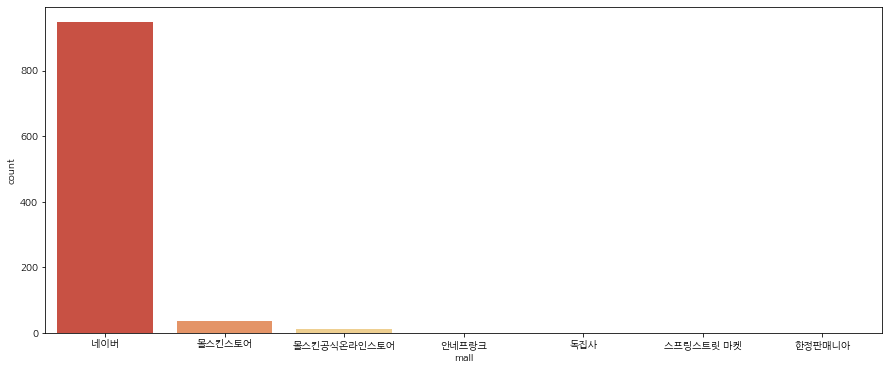

In [91]:
plt.figure(figsize=(15, 6))
sns.countplot(
    x = result_mol['mall'],
    data=result_mol,
    palette='RdYlGn',
    order=result_mol['mall'].value_counts().index
)
plt.show()